<a href="https://colab.research.google.com/github/moajjem04/TrafficSignal/blob/main/TrafficSignal_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Google Drive

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Changing Directory to the Github Folder

In [2]:
!pip install fastai --upgrade -q
from fastai.vision.all import *

In [3]:
from fastai.vision import *

In [4]:
%pwd

'/content'

In [5]:
%cd drive/MyDrive/TrafficSignal_1/TrafficSignal

/content/drive/MyDrive/TrafficSignal_1/TrafficSignal


In [6]:
%pwd

'/content/drive/MyDrive/TrafficSignal_1/TrafficSignal'

### Visualizing Images

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

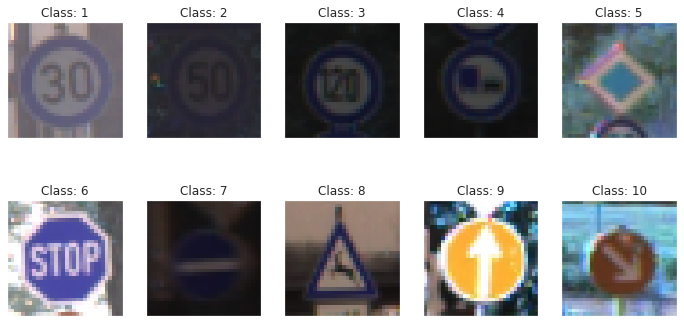

In [8]:
import cv2 as cv
from skimage import io
from skimage import color, feature, transform

fig, axs = plt.subplots(2, 5, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
for i, ax in enumerate(axs.ravel()):
  sFolder = "{0:0=5d}".format(i+1) # Format nNumFolder to folder names
  path = 'training/' + sFolder + '/00000_00009.ppm'
  Img= cv.imread(path)
  Img = transform.resize(Img,(32,32))
  ax.imshow(Img)
  ax.set_title('Class: ' + str(i+1))





In [9]:
%pwd

'/content/drive/MyDrive/TrafficSignal_1/TrafficSignal'

In [10]:
%cd /content/drive/My Drive/TrafficSignal_1/TrafficSignal/training

/content/drive/My Drive/TrafficSignal_1/TrafficSignal/training


In [11]:
# from skimage import color, feature, transform
# image = cv.imread('training/00006/00000_00009.ppm')
# image = transform.resize(image,(32,32))
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms = Resize(224))

In [12]:
dls = fields.dataloaders('.')

In [13]:
dls.vocab

['00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010']

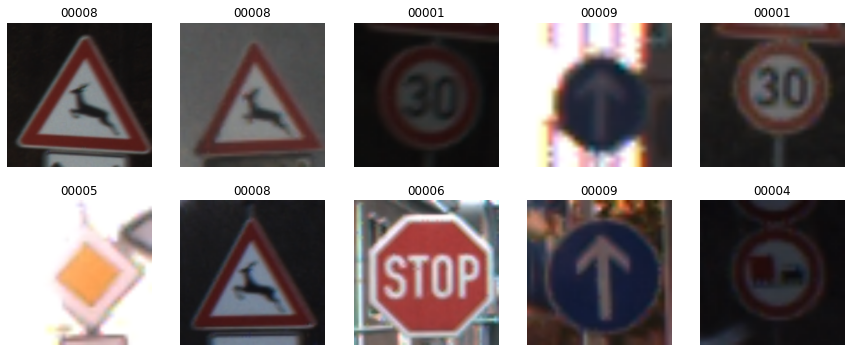

In [14]:
dls.train.show_batch(max_n = 10, nrows = 2)

# CNN Learner

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# Finding the Learning Rate

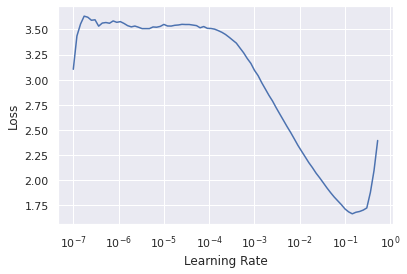

In [16]:
lr_min, lr_steep = learn.lr_find()

In [17]:
print(lr_min)
print(lr_steep)

0.014454397559165954
0.0012022644514217973


# Fit One Cycle

In [18]:
learn.fit_one_cycle(5,lr_steep)

epoch,train_loss,valid_loss,error_rate,time
0,1.464733,0.121956,0.033750,00:16
1,0.487410,0.032164,0.006250,00:16
2,0.198228,0.015362,0.003750,00:16
3,0.087447,0.016922,0.005000,00:16
4,0.048363,0.014875,0.005000,00:16


# Unfreeze the Neural Net

In [19]:
learn.unfreeze()
learn.fit_one_cycle(6,lr_steep/10)

epoch,train_loss,valid_loss,error_rate,time
0,0.022702,0.013405,0.003750,00:21
1,0.032219,0.039902,0.011250,00:20
2,0.018487,0.000496,0.000000,00:20
3,0.009826,0.000395,0.000000,00:21
4,0.005002,0.000048,0.000000,00:21
5,0.002250,0.000044,0.000000,00:21


# Results

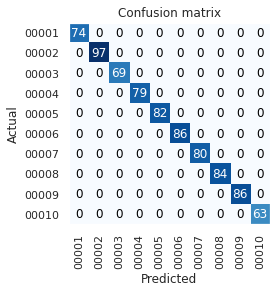

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
interp.print_classification_report()

              precision    recall  f1-score   support

       00001       1.00      1.00      1.00        74
       00002       1.00      1.00      1.00        97
       00003       1.00      1.00      1.00        69
       00004       1.00      1.00      1.00        79
       00005       1.00      1.00      1.00        82
       00006       1.00      1.00      1.00        86
       00007       1.00      1.00      1.00        80
       00008       1.00      1.00      1.00        84
       00009       1.00      1.00      1.00        86
       00010       1.00      1.00      1.00        63

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [22]:
interp.most_confused()

[]

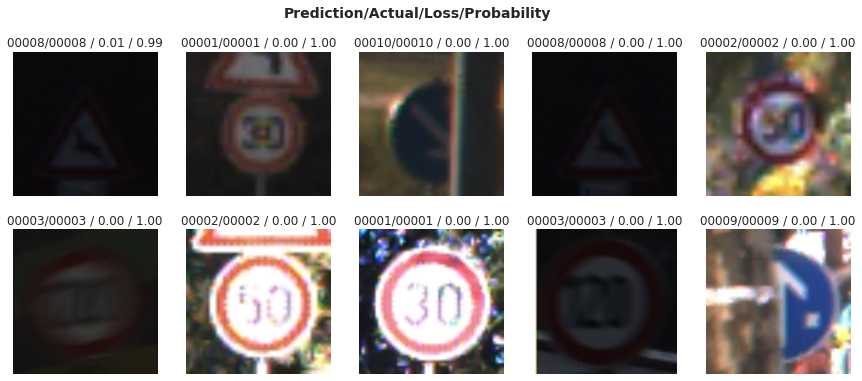

In [23]:
  interp.plot_top_losses(10,nrows =2)

# Test Result

In [37]:
%pwd

'/content/drive/My Drive/TrafficSignal_1/TrafficSignal/training'

In [43]:
import PIL
path = get_image_files('/content/drive/My Drive/TrafficSignal_1/TrafficSignal/testing/00006')
img = PIL.Image.open(path[0])
img = np.array(img)
a = learn.predict(img)
int(a[0])

6

In [49]:
import glob
import PIL
%cd /content/drive/My Drive/TrafficSignal_1/TrafficSignal
count =0;

test_image_num = 100;
test_class =10;
testingPreds = np.zeros(shape=(test_image_num*test_class,1))
testingLabels = np.zeros(shape=(test_image_num*test_class,1))

for nNumFolder in range(1,11):
  sFolder = "{0:0=5d}".format(nNumFolder) # Format nNumFolder to folder names
  path = get_image_files('/content/drive/My Drive/TrafficSignal_1/TrafficSignal/testing/' + sFolder)
  for i in range(0,100):
   #print(file)
    img = PIL.Image.open(path[i])
    img = np.array(img)
    a = learn.predict(img)
    testingLabels[count,:] = nNumFolder
    testingPreds[count,:] = int(a[0])
    count = count+1;



/content/drive/My Drive/TrafficSignal_1/TrafficSignal


In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
print(confusion_matrix(testingLabels,testingPreds))
print("\n")
print(classification_report(testingLabels,testingPreds))

[[ 91   8   0   1   0   0   0   0   0   0]
 [  2  98   0   0   0   0   0   0   0   0]
 [ 23  16  61   0   0   0   0   0   0   0]
 [  0   0   1  99   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0 100   0   0   0]
 [  0   0   1   0   0   0   0  99   0   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0   0   0   0   0   0   0   0   0 100]]


              precision    recall  f1-score   support

         1.0       0.78      0.91      0.84       100
         2.0       0.80      0.98      0.88       100
         3.0       0.97      0.61      0.75       100
         4.0       0.99      0.99      0.99       100
         5.0       1.00      1.00      1.00       100
         6.0       1.00      1.00      1.00       100
         7.0       1.00      1.00      1.00       100
         8.0       1.00      0.99      0.99       100
         9.0       1.00      1.00      1.00       100
        10.0       1.00   